# Pymaceuticals Inc.
---

### Analysis

* Overall, Capomulin and Ramicane were the most effective drugs for reducing tumor size (with an average tumor size of 40.6 and 40.2 mm3, respectively). However, both groups also had the largest amount of reported timepoints to draw these conclusions from, which may be a factor to consider

* Infubinol and Ceftamin were the drug treatments that reported the highest tumor volume at the ending timepoint of the experiment. Infubinol had an outlier significantly below the data that does not demonstrate the trend in Infubinol results

* In isolation, significant decrease in the size of the tumor in mouse by793 can be seen over the course of Capomulin treatment

* Within the mice treated with Capomulin, there is a strong positive correlation between body weight of the mouse and tumor volume, with a correlation coefficient of +0.7
- 
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [51]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [52]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [53]:
# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [54]:
merge_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [56]:
# Checking the number of mice.
mice = merge_df["Mouse ID"].unique()

In [58]:
mice_number = len(mice)
mice_number

249

In [7]:
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_bool = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_bool

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
merge_df = merge_df.set_index(["Mouse ID"])
merge_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =  merge_df.drop(index=("g989"))
clean_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [12]:
# Checking the number of mice in the clean DataFrame.
mice2 = clean_df.value_counts()
mice2

Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
0          45.000000           0                 Infubinol     Male    23          26            3
                                                 Placebo       Male    5           30            2
                                                 Zoniferol     Male    5           30            2
                                                 Ramicane      Male    11          16            2
                                                 Placebo       Female  16          25            2
                                                                                                ..
10         49.112399           1                 Infubinol     Female  17          27            1
           49.067028           1                 Ceftamin      Female  19          28            1
           49.048835           1                 Infubinol     Male    23          26            1
           49.0

In [13]:
tumor_df = clean_df.groupby(["Drug Regimen"])
tumor_df

In [14]:
tumor_df

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_mouse = (tumor_df["Tumor Volume (mm3)"]).mean()
median_mouse = (tumor_df["Tumor Volume (mm3)"]).median()
var_mouse = (tumor_df["Tumor Volume (mm3)"]).var()
sd_mouse = (tumor_df["Tumor Volume (mm3)"]).std()
sem_mouse = (tumor_df["Tumor Volume (mm3)"]).sem()

In [16]:
stats_table = pd.DataFrame({"Mean": mean_mouse,
                            "Median": median_mouse,
                            "Variance": var_mouse ,
                            "Standard Deviation": sd_mouse,
                            "SEM": sem_mouse})
stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_df.describe()

Timepoint                                                      \
                 count       mean        std  min   25%   50%    75%   max   
Drug Regimen                                                                 
Capomulin        230.0  21.565217  14.384994  0.0  10.0  20.0  35.00  45.0   
Ceftamin         178.0  19.747191  14.283969  0.0   5.0  20.0  30.00  45.0   
Infubinol        178.0  18.174157  13.473473  0.0   5.0  15.0  30.00  45.0   
Ketapril         188.0  19.707447  14.029935  0.0   5.0  20.0  30.00  45.0   
Naftisol         186.0  19.623656  14.184814  0.0   5.0  20.0  30.00  45.0   
Placebo          181.0  18.674033  13.890798  0.0   5.0  15.0  30.00  45.0   
Propriva         148.0  17.060811  13.676648  0.0   5.0  15.0  26.25  45.0   
Ramicane         228.0  21.425439  14.275720  0.0  10.0  20.0  35.00  45.0   
Stelasyn         181.0  19.226519  13.842710  0.0   5.0  20.0  30.00  45.0   
Zoniferol        182.0  19.368132  14.384679  0.0   5.0  15.0  30.00  45.0   

             Tumor Volume (mm3)             ... Age_months       Weight (g)  \
                          count       mean  ...        75%   max      count   
Drug Regimen                                ...                               
Capomulin                 230.0  40.675741  ...       20.0  24.0      230.0   
Ceftamin                  178.0  52.591172  ...       20.0  24.0      178.0   
Infubinol                 178.0  52.884795  ...       23.0  24.0      178.0   
Ketapril                  188.0  55.235638  ...       19.0  24.0      188.0   
Naftisol                  186.0  54.331565  ...       19.0  23.0      186.0   
Placebo                   181.0  54.033581  ...       17.0  21.0      181.0   
Propriva                  148.0  52.320930  ...       16.0  24.0      148.0   
Ramicane                  228.0  40.216745  ...       18.0  23.0      228.0   
Stelasyn                  181.0  54.233149  ...       21.0  23.0      181.0   
Zoniferol                 182.0  53.236507  ...       16.0  24.0      182.0   

                                                                 
                   mean       std   min   25%   50%   75%   max  
Drug Regimen                                                     
Capomulin     19.965217  2.732404  15.0  17.0  20.5  22.0  25.0  
Ceftamin      27.398876  1.581460  25.0  26.0  28.0  28.0  30.0  
Infubinol     27.196629  2.183810  23.0  25.0  27.0  29.0  30.0  
Ketapril      27.861702  1.841884  25.0  26.0  28.0  30.0  30.0  
Naftisol      27.166667  1.499249  25.0  26.0  27.0  28.0  30.0  
Placebo       27.928177  1.837973  25.0  27.0  28.0  30.0  30.0  
Propriva      27.135135  1.712891  25.0  26.0  26.0  29.0  30.0  
Ramicane      19.679825  3.235014  16.0  17.0  19.0  22.0  25.0  
Stelasyn      27.856354  1.643616  25.0  27.0  28.0  29.0  30.0  
Zoniferol     27.692308  1.419612  25.0  27.0  28.0  29.0  30.0  

[10 rows x 40 columns]

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_time = clean_df[["Drug Regimen", "Timepoint"]]
drug_time.set_index("Drug Regimen")

,Timepoint
Drug Regimen,
Capomulin,0
Capomulin,5
Capomulin,10
Capomulin,15
Capomulin,20
...,...
Capomulin,25
Capomulin,30
Capomulin,35


In [20]:
drug_reg = drug_time["Drug Regimen"].value_counts()
drug_reg

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [21]:
drug_time_df = pd.DataFrame(drug_reg)
drug_time_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,148


Text(0, 0.5, 'Timepoints')

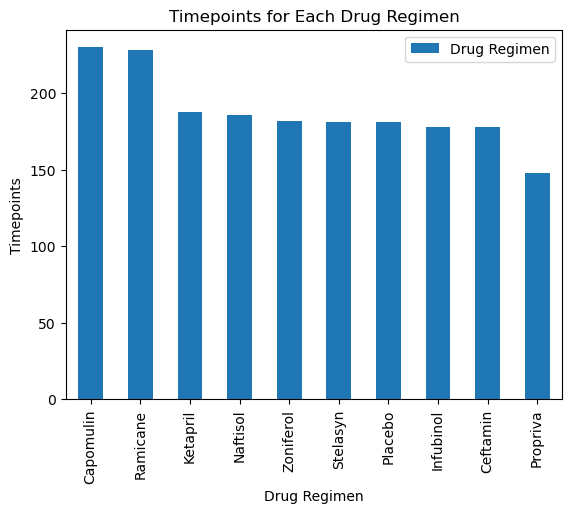

In [22]:
drug_time_df.plot(kind="bar")
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

Text(0, 0.5, 'Timepoints')

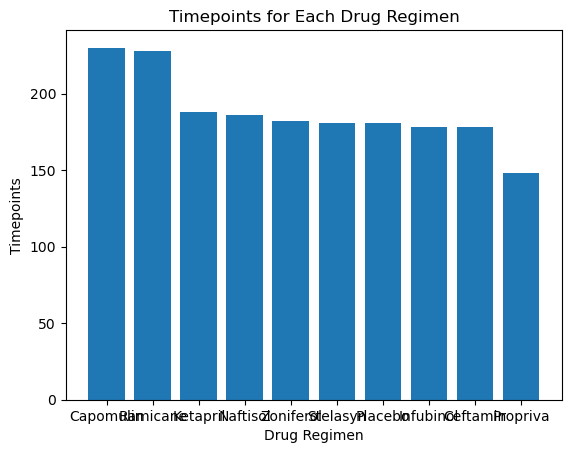

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
graph2 = plt.bar(counts.index.values,counts.values)
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


<AxesSubplot:title={'center':'Sample by Sex'}, ylabel='Sex'>

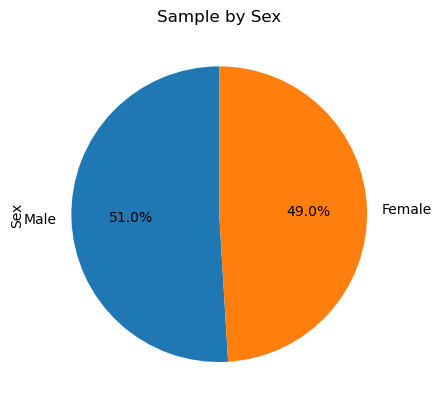

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = (clean_df["Sex"]).value_counts()
mice_sex.plot.pie(autopct="%1.1f%%", startangle=90, title='Sample by Sex')

Text(0.5, 1.0, 'Sample by Sex')

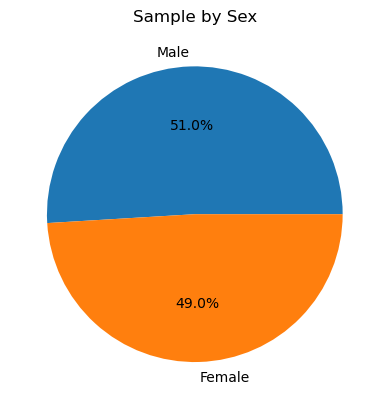

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.title("Sample by Sex")

## Quartiles, Outliers and Boxplots

In [26]:
df_sorted = clean_df.sort_values("Timepoint")

In [27]:
df_sorted

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
v409,0,45.000000,0,Placebo,Female,16,25
u946,0,45.000000,0,Propriva,Male,5,30
w140,0,45.000000,0,Zoniferol,Female,19,30
a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...
j989,45,36.134852,1,Ramicane,Male,8,19
x773,45,58.634971,4,Placebo,Female,21,30
j119,45,38.125164,1,Capomulin,Female,7,23


In [28]:
# Find max timepoint for each mouse
maxtime_df = pd.DataFrame(df_sorted.groupby('Mouse ID')['Timepoint'].max())
maxtime_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [29]:
maxtime_df = maxtime_df.rename(columns={"Timepoint": "Max Timepoint"})
maxtime_df

,Max Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [30]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(maxtime_df, clean_df, on="Mouse ID", how="right")
final_df

,Max Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,,
b128,45,0,45.000000,0,Capomulin,Female,9,22
b128,45,5,45.651331,0,Capomulin,Female,9,22
b128,45,10,43.270852,0,Capomulin,Female,9,22
b128,45,15,43.784893,0,Capomulin,Female,9,22
b128,45,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
m601,45,25,33.118756,1,Capomulin,Male,22,17
m601,45,30,31.758275,1,Capomulin,Male,22,17
m601,45,35,30.834357,1,Capomulin,Male,22,17


In [31]:
maxmouse_df = final_df.loc[final_df['Timepoint'] == final_df['Max Timepoint']]
maxmouse_df

,Max Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,,
b128,45,45,38.982878,2,Capomulin,Female,9,22
f932,0,0,45.000000,0,Ketapril,Male,15,29
g107,35,35,71.905117,0,Ketapril,Female,2,29
a457,10,10,49.783419,0,Ketapril,Female,11,30
c819,40,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
t565,45,45,34.455298,0,Capomulin,Female,20,17
i557,45,45,47.685963,1,Capomulin,Female,1,24
m957,45,45,33.329098,1,Capomulin,Female,3,19


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in treatments:
   
    tumor_vol = maxmouse_df.loc[maxmouse_df['Drug Regimen'] == each_drug, "Tumor Volume (mm3)"]                                
    tumor_list.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {each_drug}: {iqr}') 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {lower_bound} for {each_drug} could be outliers')
    print(f'Values above {upper_bound} for {each_drug} could be outliers')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IQR for Capomulin: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers
Values above 51.83201549 for Capomulin could be outliers
IQR for Ramicane: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers
Values above 54.30681135 for Ramicane could be outliers
IQR for Infubinol: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers
Values above 82.74144559000001 for Infubinol could be outliers
IQR for Ceftamin: 15.577752179999997
Values below 25.355449580000002 for Ceftamin could be outliers
Values above 87.66645829999999 for Ceftamin could be outliers


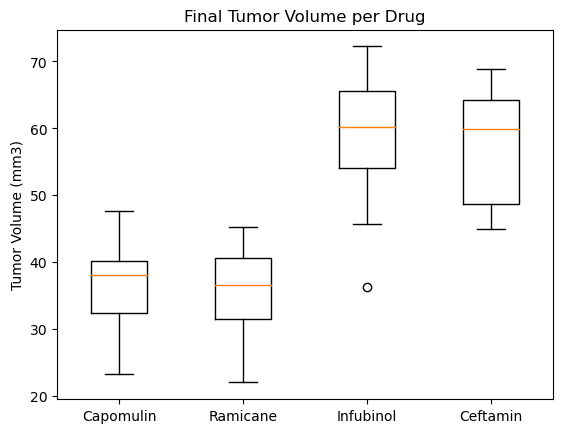

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_list)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.title('Final Tumor Volume per Drug')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# fig1, ax1 = plt.subplots()
# ax1.set_title('Mouse Final Tumor Volume')
# ax1.boxplot(tumor_vol)
# plt.show()


## Line and Scatter Plots

In [34]:
final_df.reset_index(inplace=True)

In [35]:
final_df.columns

Index(['Mouse ID', 'Max Timepoint', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse = final_df.loc[final_df['Mouse ID'] == 'y793',:]
single_mouse

,Mouse ID,Max Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1792,y793,45,0,45.000000,0,Capomulin,Male,17,17
1793,y793,45,5,41.019913,0,Capomulin,Male,17,17
1794,y793,45,10,41.630010,1,Capomulin,Male,17,17
1795,y793,45,15,42.283665,1,Capomulin,Male,17,17
1796,y793,45,20,40.716428,2,Capomulin,Male,17,17
1797,y793,45,25,38.992734,2,Capomulin,Male,17,17
1798,y793,45,30,35.726023,2,Capomulin,Male,17,17
1799,y793,45,35,36.327870,2,Capomulin,Male,17,17
1800,y793,45,40,31.475411,2,Capomulin,Male,17,17
1801,y793,45,45,31.896238,2,Capomulin,Male,17,17


In [37]:
single_mouse.columns

Index(['Mouse ID', 'Max Timepoint', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [38]:
mouse_x = single_mouse["Timepoint"]
mouse_y = single_mouse["Tumor Volume (mm3)"]

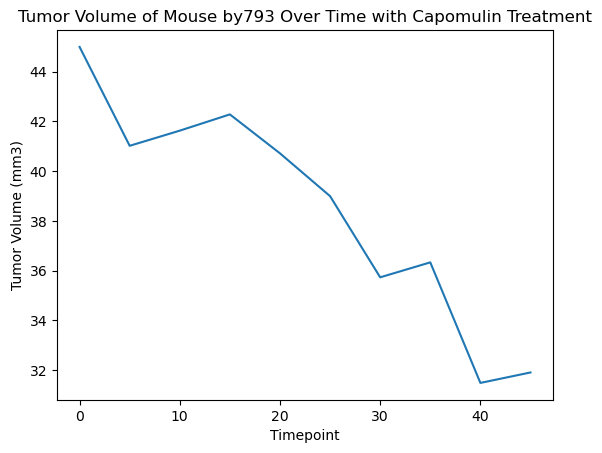

In [39]:
plt.plot(mouse_x, mouse_y)
plt.title("Tumor Volume of Mouse by793 Over Time with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
capomulin_mouse


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [41]:
avg_tumor_vol = capomulin_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.rename(columns = {'Tumor Volume (mm3)':'Average Tumor Volume'}, inplace = True)
avg_tumor_vol.head()

,Mouse ID,Average Tumor Volume
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [42]:
capomulin_mouse2 = pd.merge(capomulin_mouse, avg_tumor_vol, on="Mouse ID", how="outer")
capomulin_mouse2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Average Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,41.963636
1,b128,5,45.651331,0,Capomulin,Female,9,22,41.963636
2,b128,10,43.270852,0,Capomulin,Female,9,22,41.963636
3,b128,15,43.784893,0,Capomulin,Female,9,22,41.963636
4,b128,20,42.731552,0,Capomulin,Female,9,22,41.963636
...,...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17,34.847470
226,m601,30,31.758275,1,Capomulin,Male,22,17,34.847470
227,m601,35,30.834357,1,Capomulin,Male,22,17,34.847470
228,m601,40,31.378045,1,Capomulin,Male,22,17,34.847470


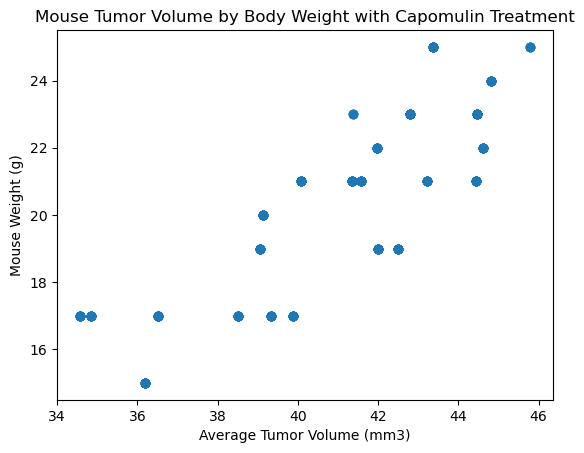

In [43]:
plt.scatter((capomulin_mouse2["Average Tumor Volume"]), (capomulin_mouse2["Weight (g)"]))
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Tumor Volume by Body Weight with Capomulin Treatment")
plt.show()

## Correlation and Regression

The r-squared is: 0.696216453592533


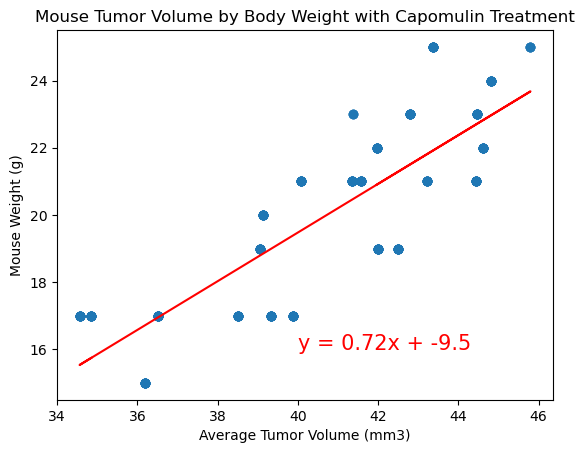

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = (capomulin_mouse2["Average Tumor Volume"])
y_values = (capomulin_mouse2["Weight (g)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,16),fontsize=15,color="red")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Tumor Volume by Body Weight with Capomulin Treatment")
print(f"The r-squared is: {rvalue**2}")
plt.show()